In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset =fetch_olivetti_faces('../NMF')

In [ ]:
{data,images,target,\}

In [8]:
dataset['data'].shape

(400, 4096)

In [30]:
dataset['images'][2]

array([[0.3181818 , 0.40082645, 0.49173555, ..., 0.40082645, 0.3553719 ,
        0.30991736],
       [0.30991736, 0.3966942 , 0.47933885, ..., 0.40495867, 0.37603307,
        0.30165288],
       [0.26859504, 0.34710744, 0.45454547, ..., 0.3966942 , 0.37190083,
        0.30991736],
       ...,
       [0.1322314 , 0.09917355, 0.08264463, ..., 0.13636364, 0.14876033,
        0.15289256],
       [0.11570248, 0.09504132, 0.0785124 , ..., 0.1446281 , 0.1446281 ,
        0.1570248 ],
       [0.11157025, 0.09090909, 0.0785124 , ..., 0.14049587, 0.14876033,
        0.15289256]], dtype=float32)

In [95]:
def show_diff_images(images,unique_id):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    print(images.shape)
    for ids in (unique_id): 
        image_index=ids*10
        axarr[ids].imshow(images[image_index])
        axarr[ids].set_xticks([])
        axarr[ids].set_yticks([])
        axarr[ids].set_title("face id {}".format(ids))
    plt.show()
        

(400, 64, 64)


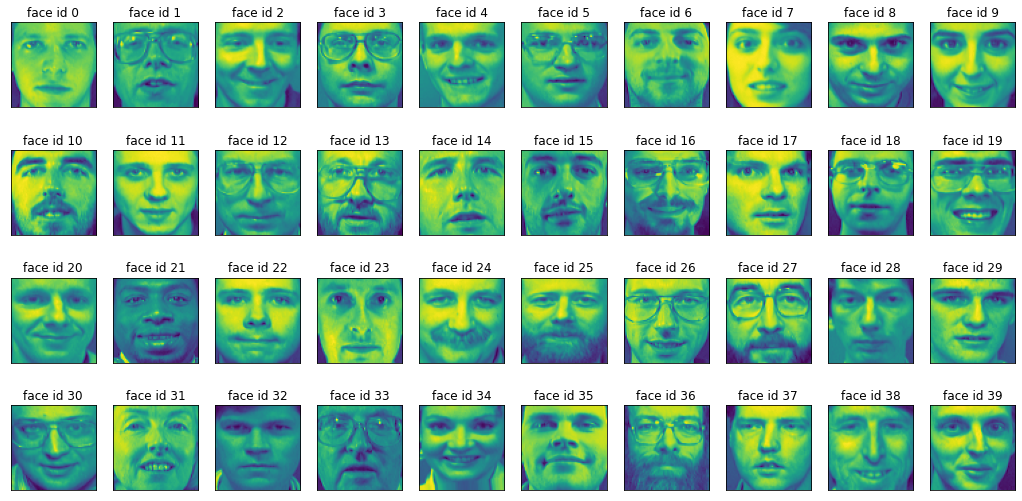

In [96]:
show_diff_images(dataset['images'],unique_id)

In [112]:
class NMF:
    
    def __init__(self):
        self.loss = []
        self.V = 0
        self.iteration = 0
        self.W = 0
        self.H = 0
        
    def Cost_function(self,A,B):
        n,m = A.shape
        cost = 0
        for i in range(n):
            for j in range(m):
                cost += (A[i][j] - B[i][j])**2
        return cost     
    
    def fit(self,V,r,iteration):
        self.V = V
        self.iteration = iteration
        m,n = self.V.shape
        #intialisation
        W = np.random.randint(1,15,size=(m,r))
        H = np.random.randint(1,5,size=(r,n))
        for i in range(self.iteration):
            H = np.multiply(H,(np.divide((np.dot(W.T,V)),(np.dot(W.T,np.dot(W,H))))))
            W = np.multiply(W,(np.divide((np.dot(V,H.T)),(np.dot(W,np.dot(H,H.T))))))
            self.loss.append(self.Cost_function(V,np.dot(W,H)))
        self.W = W
        self.H = H
        
    def plot_cost(self):
        y =np.array(self.loss) 
        x = np.arange(0,self.iteration)
        plt.title("cost")
        plt.xlabel("iter")
        plt.ylabel("Loss")
        plt.plot(x, y, color ="red")
        plt.show()
    
    def get_factors(self):
        return (self.W,self.H)
    

In [113]:
model = NMF()

In [106]:
dataset['data'].shape

(400, 4096)

In [114]:
model.fit(dataset['data'],40,100)

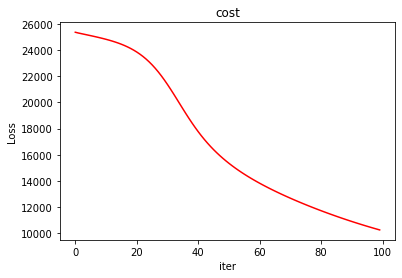

In [117]:
model.plot_cost()

In [115]:
W,H = model.get_factors()

In [116]:
(W@H).shape

(400, 4096)

In [127]:
recon_images = (W@H)
recon_data = []
for i in range(len(recon_images)):
    recon_data.append(recon_images[i].reshape(64,64))
recon_data = np.array(recon_data)    
recon_data.shape    

(400, 64, 64)